In [1]:
import numpy as np 
import pandas as pd
import sklearn       
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
import imblearn
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

In [2]:
data = pd.read_csv('Fire_Department_Calls_for_Service.csv', parse_dates=['Received DtTm'], low_memory=False)
data.head()

Call Number Unit ID  Incident Number         Call Type   Call Date  \
0    210690030     T03         21030278            Alarms  03/10/2021   
1    203421272  BLS841         20139667  Medical Incident  12/07/2020   
2    210683285      58         21030264    Structure Fire  03/09/2021   
3    203341976    VAN1         20136406  Medical Incident  11/29/2020   
4     91710188     T06          9050618             Other  06/20/2009   

   Watch Date       Received DtTm              Entry DtTm  \
0  03/09/2021 2021-03-10 00:16:03  03/10/2021 12:18:36 AM   
1  12/07/2020 2020-12-07 11:26:17  12/07/2020 11:26:17 AM   
2  03/09/2021 2021-03-09 23:06:09  03/09/2021 11:08:23 PM   
3  11/29/2020 2020-11-29 16:59:48  11/29/2020 04:59:48 PM   
4  06/20/2009 2009-06-20 14:02:18  06/20/2009 02:02:42 PM   

            Dispatch DtTm           Response DtTm  ... Call Type Group  \
0  03/10/2021 12:19:01 AM  03/10/2021 12:20:15 AM  ...           Alarm   
1  12/07/2020 11:26:17 AM  12/07/2020 11:26:17 AM  ...             NaN   
2  03/09/2021 11:08:35 PM  03/09/2021 11:08:43 PM  ...           Alarm   
3  11/29/2020 04:59:48 PM  11/29/2020 04:59:48 PM  ...             NaN   
4  06/20/2009 02:02:52 PM  06/20/2009 02:03:48 PM  ...             NaN   

  Number of Alarms Unit Type Unit sequence in call dispatch  \
0                1     TRUCK                            3.0   
1                1     CHIEF                            1.0   
2                1     MEDIC                           10.0   
3                1   SUPPORT                            1.0   
4                1     TRUCK                            1.0   

  Fire Prevention District Supervisor District  \
0                        2                   6   
1                        4                   2   
2                        2                   6   
3                        2                   6   
4                        2                   8   

  Neighborhooods - Analysis Boundaries             RowID  \
0                           Tenderloin     210690030-T03   
1                               Marina  203421272-BLS841   
2                           Tenderloin      210683285-58   
3                           Tenderloin    203341976-VAN1   
4                  Castro/Upper Market     091710188-T06   

                                   case_location Analysis Neighborhoods  
0   POINT (-122.41697932641094 37.7770834641944)                   36.0  
1                                            NaN                    NaN  
2  POINT (-122.41324374873464 37.78295349313507)                   36.0  
3                                            NaN                    NaN  
4       POINT (-122.42789342705 37.763633561952)                    5.0  

[5 rows x 35 columns]

In [3]:
df = pd.DataFrame()
df['Zip']=data['Neighborhooods - Analysis Boundaries']
df['Hour'] = data['Received DtTm'].dt.hour
df['Month'] = data['Received DtTm'].dt.month
df['DayWeek'] = data['Received DtTm'].dt.dayofweek
df['Type'] = data['Call Type Group']
df = df.dropna()
df.dtypes

Zip        object
Hour        int64
Month       int64
DayWeek     int64
Type       object
dtype: object

In [4]:
df['Type'].value_counts()

Potentially Life-Threatening    1367127
Non Life-threatening             692115
Alarm                            676204
Fire                             117334
Name: Type, dtype: int64

In [5]:
X = pd.DataFrame()
zip_dummies = pd.get_dummies(df['Zip'])
X[zip_dummies.columns] = zip_dummies
hour_dummies = pd.get_dummies(df['Hour'])
X[hour_dummies.columns] = hour_dummies
month_dummies = pd.get_dummies(df['Month'])
X[month_dummies.columns] = month_dummies
day_dummies = pd.get_dummies(df['DayWeek'])
X[day_dummies.columns] = day_dummies
X.head()

Bayview Hunters Point  Bernal Heights  Castro/Upper Market  Chinatown  \
0                       0               0                    0          0   
2                       0               0                    0          0   
8                       0               0                    0          0   
10                      1               0                    0          0   
11                      0               0                    0          0   

    Excelsior  Financial District/South Beach  Glen Park  Golden Gate Park  \
0           0                               0          0                 0   
2           0                               0          0                 0   
8           0                               0          0                 0   
10          0                               0          0                 0   
11          0                               0          0                 0   

    Haight Ashbury  Hayes Valley  ...  14  15  16  17  18  19  20  21  22  23  
0                0             0  ...   0   0   0   0   0   0   0   0   0   0  
2                0             0  ...   0   0   0   0   0   0   0   0   0   1  
8                0             0  ...   0   0   0   0   1   0   0   0   0   0  
10               0             0  ...   0   0   0   0   0   0   0   0   1   0  
11               0             0  ...   0   0   0   0   0   0   0   0   0   0  

[5 rows x 66 columns]

<AxesSubplot:>

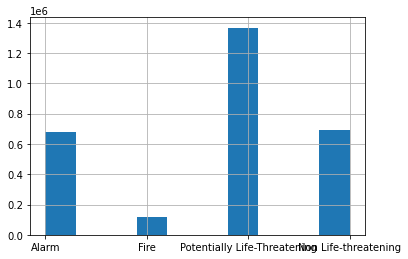

In [6]:
y = df['Type']
y.hist()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2567502, 66)
(285278, 66)
(2567502,)
(285278,)


In [8]:
classifiers = [
  ("Nearest Neighbors",   KNeighborsClassifier(3)),
  ("Decision Tree",       DecisionTreeClassifier()),
  ("Random Forest",       RandomForestClassifier()),
  ("MLP",                 MLPClassifier()),
  ("AdaBoost",            AdaBoostClassifier()),
  ("Naive Bayes",         GaussianNB()),
  ("Logistic Regression", LogisticRegression())
]

Nearest Neighbors - aciertos: 0.37


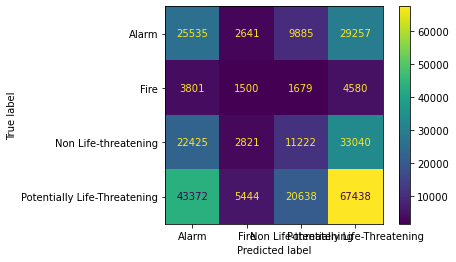

Decision Tree - aciertos: 0.49


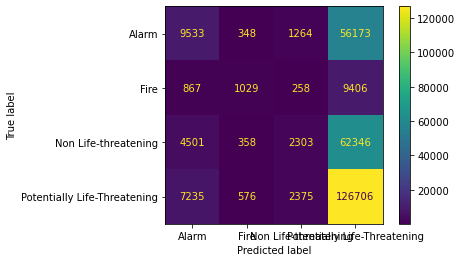

Random Forest - aciertos: 0.49


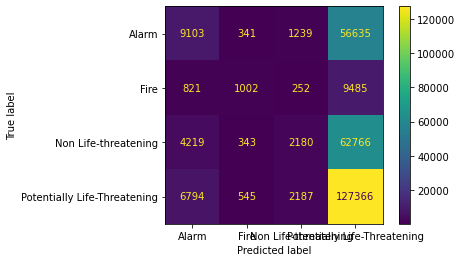

MLP - aciertos: 0.48


AdaBoost - aciertos: 0.48


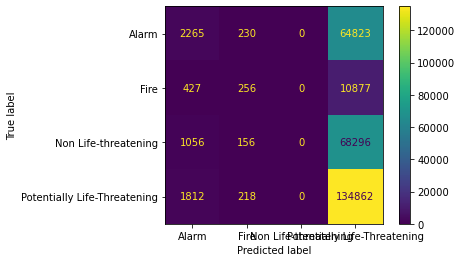

Naive Bayes - aciertos: 0.43


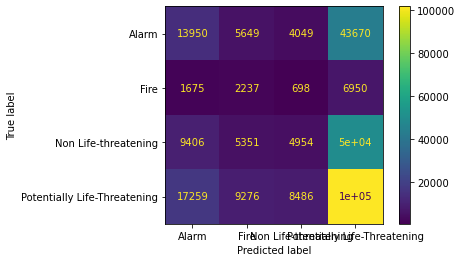

C:\Users\Administrator\anaconda3\envs\cpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - aciertos: 0.48


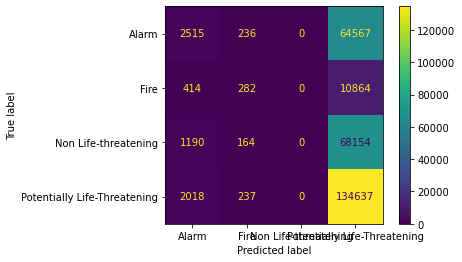

In [9]:
#%%capture --no-stdout

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('{} - aciertos: {:.2f}'.format(name, score))
    plot_confusion_matrix(clf, X_test, y_test)  
    plt.show()

In [10]:
oversample = RandomOverSampler(sampling_strategy='auto', random_state=123)
X_over, y_over = oversample.fit_resample(X, y)

<AxesSubplot:>

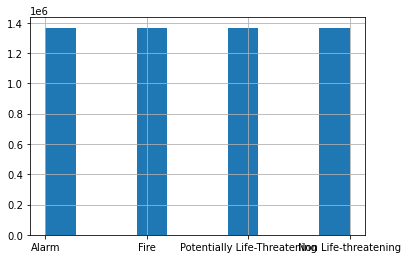

In [11]:
y_over.hist()

(4921657, 66)
(546851, 66)
(4921657,)
(546851,)
Nearest Neighbors - aciertos: 0.34


Decision Tree - aciertos: 0.41


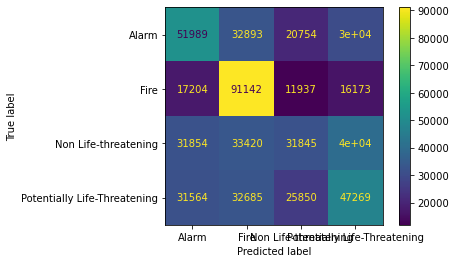

Random Forest - aciertos: 0.41


MLP - aciertos: 0.37


AdaBoost - aciertos: 0.34


Naive Bayes - aciertos: 0.31


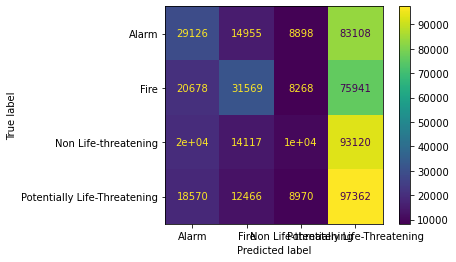

C:\Users\Administrator\anaconda3\envs\cpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - aciertos: 0.34


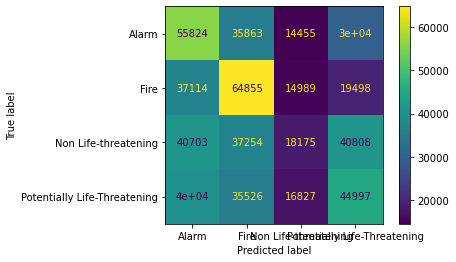

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.1, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


for name, clf in classifiers:
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('{} - aciertos: {:.2f}'.format(name, score))
    plot_confusion_matrix(clf, X_test, y_test)  
    plt.show()

<AxesSubplot:>

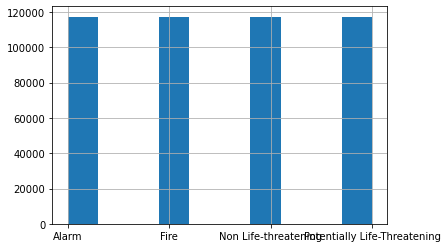

In [16]:
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=123)
X_under, y_under = undersample.fit_resample(X, y)
y_under.hist()

(422402, 66)
(46934, 66)
(422402,)
(46934,)
Nearest Neighbors - aciertos: 0.32


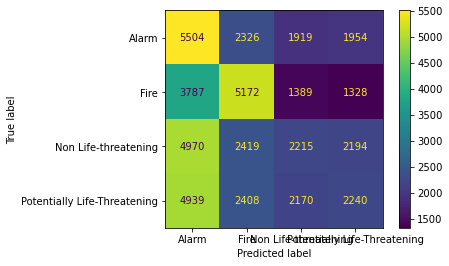

Decision Tree - aciertos: 0.38


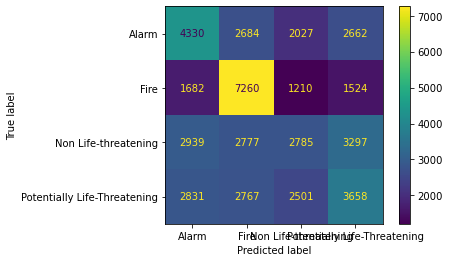

Random Forest - aciertos: 0.38


MLP - aciertos: 0.36


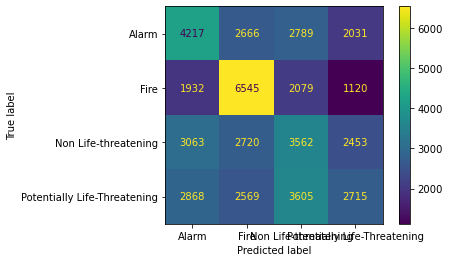

AdaBoost - aciertos: 0.33


Naive Bayes - aciertos: 0.30


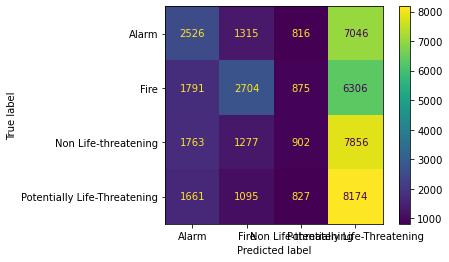

Logistic Regression - aciertos: 0.34


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.1, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


for name, clf in classifiers:
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('{} - aciertos: {:.2f}'.format(name, score))
    plot_confusion_matrix(clf, X_test, y_test)  
    plt.show()